<a href="https://colab.research.google.com/github/luijansuarez/Data-Preparation-and-GeoPandas/blob/main/M1_Topic4_Data_Preparation_Recap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

# Import Data

In [ ]:
# List of file names and corresponding years
files = dict()

for file in os.listdir():
  if 'supply' in file:
    year = int(file.split('.')[0].split('_')[2])
    files[file] = year

In [ ]:
files

{'supply_data_2020.xlsx': 2020,
 'supply_data_2023.xlsx': 2023,
 'supply_data_2021.xlsx': 2021,
 'supply_data_2024.xlsx': 2024,
 'supply_data_2022.xlsx': 2022}

In [ ]:
# Initialize an empty list to store DataFrames
all_data = list()

for file,year in tqdm(files.items()):
  xls = pd.ExcelFile(file)
  for month in range(1,13):
    sheet_name = f'Month_{month}'
    df = pd.read_excel(xls,sheet_name = sheet_name)
    df['Year'] = year
    df['Month'] = month
    all_data.append(df)

100%|██████████| 5/5 [00:33<00:00,  6.60s/it]


In [ ]:
#joining all the data

df = pd.concat(all_data, ignore_index=True)

In [ ]:
df.head()

,Date,Order_ID,SKU_Name,Quantity,Sales,Location,Year,Month
0,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-1717,32,375.04,Gauthier Jacquot S.A.S.,2020,1
1,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-7661,36,615.96,Gauthier Jacquot S.A.S.,2020,1
2,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-6001,43,402.05,Gauthier Jacquot S.A.S.,2020,1
3,2020-01-06,fe89c540-d2fb-404e-a672-d6b0ea897e2d,SKU-6780,1,4.09,Carlier SA,2020,1
4,2020-01-06,fe89c540-d2fb-404e-a672-d6b0ea897e2d,SKU-8445,4,19.76,Carlier SA,2020,1


In [ ]:
#sorting data by Year and Month
df = df.sort_values(by=['Year','Month'])

In [ ]:
df

,Date,Order_ID,SKU_Name,Quantity,Sales,Location,Year,Month
0,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-1717,32,375.04,Gauthier Jacquot S.A.S.,2020,1
1,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-7661,36,615.96,Gauthier Jacquot S.A.S.,2020,1
2,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-6001,43,402.05,Gauthier Jacquot S.A.S.,2020,1
3,2020-01-06,fe89c540-d2fb-404e-a672-d6b0ea897e2d,SKU-6780,1,4.09,Carlier SA,2020,1
4,2020-01-06,fe89c540-d2fb-404e-a672-d6b0ea897e2d,SKU-8445,4,19.76,Carlier SA,2020,1
...,...,...,...,...,...,...,...,...
265066,2024-12-02,77a64d40-70e4-4332-abad-64b8741cbd9c,SKU-3852,69,1300.81,Clerc Bouvier SA,2024,12
265067,2024-12-02,77a64d40-70e4-4332-abad-64b8741cbd9c,SKU-1173,27,364.66,Clerc Bouvier SA,2024,12
265068,2024-12-02,77a64d40-70e4-4332-abad-64b8741cbd9c,SKU-7661,3,57.77,Clerc Bouvier SA,2024,12
265069,2024-12-02,77a64d40-70e4-4332-abad-64b8741cbd9c,SKU-5004,75,631.41,Clerc Bouvier SA,2024,12


## Fix Missing or Improper Format Values

In [ ]:
df.isna().sum()

,0
Date,0
Order_ID,0
SKU_Name,0
Quantity,0
Sales,2986
Location,0
Year,0
Month,0


In [ ]:
# Veamos si hay valores que no sean nulos pero que no representan un numero
unique_text_values = list()
for value in df['Sales']:
  if isinstance(value, str) and value not in unique_text_values:
     unique_text_values.append(value)

In [ ]:
unique_text_values

['_', 'na', 'missing', 'manquante', 'no', '-']

In [ ]:
# A todos aquellos valores que son un string los vamos a sustituir por un valor nulo
df['Sales'] = df['Sales'].replace(unique_text_values, np.nan)

/tmp/ipython-input-3812178739.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sales'] = df['Sales'].replace(unique_text_values, np.nan)


In [ ]:
# Verificamos ahora cuantos son los valores nulos totales
df['Sales'].isna().sum()

np.int64(6541)

In [ ]:
# Identificamos cuales son los SKUs unicos para conocer en que formato estan cada uno
df['SKU_Name'].unique()

array(['SKU-1717', 'SKU-7661', 'SKU-6001', 'SKU-6780', 'SKU-8445',
       'SKU-2972', 'SKU-2983', 'SKU-6682', 'SKU-7054', 'SKU-3044',
       'SKU-9023', 'SKU-1173', 'SKU-7899', 'SKU-9325', 'SKU-6106',
       'SKU-5004', 'SKU-7394', 'SKU-2972_fr', 'SKU-5304', '@SKU-9325',
       'SKU-3852', 'SKU-5373', 'SKU-7899_fr', '@SKU-6001', '@SKU-6780',
       'SKU-6682_fr', 'SKU-9325_fr', 'SKU-6780_fr', 'SKU-7394_fr',
       '@SKU-5373', '@SKU-1173', '@SKU-2972', '@SKU-3852', '@SKU-6106',
       '@SKU-2983', 'SKU-5304_fr', 'SKU-3852_fr', 'SKU-9023_fr',
       '@SKU-9023', '@SKU-7054', '@SKU-7394', '@SKU-5304', '@SKU-6682',
       '@SKU-5004', '@SKU-3044', 'SKU-5004_fr', '@SKU-7899',
       'SKU-7054_fr', '@SKU-8445', 'SKU-1717_fr', 'SKU-6106_fr',
       '@SKU-1717', 'SKU-6001_fr', '@SKU-7661', 'SKU-7661_fr',
       'SKU-8445_fr', 'SKU-3044_fr', 'SKU-5373_fr', 'SKU-2983_fr',
       'SKU-1173_fr'], dtype=object)

In [ ]:
# Vemos de que forma pueden estar representado un SKU, de esta forma podremos saber que extraer y con que quedarnos
df[df['SKU_Name'].str.contains('SKU-6001', na=False)]['SKU_Name'].unique()

array(['SKU-6001', '@SKU-6001', 'SKU-6001_fr'], dtype=object)

In [ ]:
# Eliminamos los prefijos o sufijos que tengan los SKUs
def sku_fix_name(sku_name):
  return sku_name.replace("@","").replace("_fr","")

In [ ]:
# Probamos con un ejemplo
sku_fix_name('@SKU-7661')

'SKU-7661'

In [ ]:
# Aplicamos la funcion a todos los SKU_Name
df['SKU_Name']=df['SKU_Name'].apply(sku_fix_name)

In [ ]:
df['SKU_Name'].unique()

array(['SKU-1717', 'SKU-7661', 'SKU-6001', 'SKU-6780', 'SKU-8445',
       'SKU-2972', 'SKU-2983', 'SKU-6682', 'SKU-7054', 'SKU-3044',
       'SKU-9023', 'SKU-1173', 'SKU-7899', 'SKU-9325', 'SKU-6106',
       'SKU-5004', 'SKU-7394', 'SKU-5304', 'SKU-3852', 'SKU-5373'],
      dtype=object)

In [ ]:
len(df['SKU_Name'].unique())

20

In [ ]:
# Creamos un index que contiene las posiciones donde hay valores nulos para Sales
missing_sales_indices = df[df['Sales'].isna()].index

In [ ]:
# Contamos cuantos valores hay en ese index
len(missing_sales_indices)

6541

In [ ]:
df

,Date,Order_ID,SKU_Name,Quantity,Sales,Location,Year,Month
0,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-1717,32,375.04,Gauthier Jacquot S.A.S.,2020,1
1,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-7661,36,615.96,Gauthier Jacquot S.A.S.,2020,1
2,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-6001,43,402.05,Gauthier Jacquot S.A.S.,2020,1
3,2020-01-06,fe89c540-d2fb-404e-a672-d6b0ea897e2d,SKU-6780,1,4.09,Carlier SA,2020,1
4,2020-01-06,fe89c540-d2fb-404e-a672-d6b0ea897e2d,SKU-8445,4,19.76,Carlier SA,2020,1
...,...,...,...,...,...,...,...,...
265066,2024-12-02,77a64d40-70e4-4332-abad-64b8741cbd9c,SKU-3852,69,1300.81,Clerc Bouvier SA,2024,12
265067,2024-12-02,77a64d40-70e4-4332-abad-64b8741cbd9c,SKU-1173,27,364.66,Clerc Bouvier SA,2024,12
265068,2024-12-02,77a64d40-70e4-4332-abad-64b8741cbd9c,SKU-7661,3,57.77,Clerc Bouvier SA,2024,12
265069,2024-12-02,77a64d40-70e4-4332-abad-64b8741cbd9c,SKU-5004,75,631.41,Clerc Bouvier SA,2024,12


In [ ]:
# Creamos una funcion que identificara year, sku y quantity de aquellas filas cuya Sales esta vacia.
# Generamos un punto de comparacion usando year y sku para poder calcular un price_per_unit controlando variables macro y micro
# Una vez calculado el price_per_unit usamos la quantity para determinar Sales de ese renglon y lo sustituimos en el df
for idx in tqdm(missing_sales_indices):
  year = df.loc[idx,'Year']
  sku = df.loc[idx, 'SKU_Name']
  quantity = df.loc[idx, 'Quantity']
  relevant_dat = df[(df['Year']== year) & (df['SKU_Name'] == sku) & (df['Sales'].notna())]
  if not relevant_dat.empty:
    price_per_unit = (relevant_dat['Sales']/relevant_dat['Quantity']).mean()
    df.loc[idx,'Sales']=price_per_unit*quantity
  else:
    df.loc[idx,'Sales']=0

100%|██████████| 6541/6541 [04:14<00:00, 25.69it/s]


In [ ]:
# Validamos que en efecto ya no tengamos valores nulos
df.isna().sum()

,0
Date,0
Order_ID,0
SKU_Name,0
Quantity,0
Sales,0
Location,0
Year,0
Month,0


##Data Analysis

In [ ]:
location_df = pd.read_excel('stores.xlsx')

In [ ]:
location_df

,location,city,lat,lng,region
0,Rolland,Le Havre,49.4900,0.1000,Normandie
1,Reynaud S.A.,Strasbourg,48.5833,7.7458,Grand Est
2,Girard,Paris,48.8567,2.3522,Île-de-France
3,Martel,Lille,50.6278,3.0583,Hauts-de-France
4,Perret,Paris,48.8567,2.3522,Île-de-France
...,...,...,...,...,...
295,Techer Paul S.A.R.L.,Saint-Étienne,45.4347,4.3903,Auvergne-Rhône-Alpes
296,Gauthier Jacquot S.A.S.,Bordeaux,44.8400,-0.5800,Nouvelle-Aquitaine
297,Launay,Strasbourg,48.5833,7.7458,Grand Est
298,Lelièvre Legrand S.A.R.L.,Toulouse,43.6045,1.4440,Occitanie


In [ ]:
# para que ambas DF tengan el mismo localizador de Location modificamos el nombre de la columna en location_df
# es igual usar location_df.rename(columns={'location':'Location'},inplace=True) a
#               location_df = location_df.rename(columns={'location':'Location'})
location_df = location_df.rename(columns={'location':'Location'})

In [ ]:
location_df.head()

,Location,city,lat,lng,region
0,Rolland,Le Havre,49.4900,0.1000,Normandie
1,Reynaud S.A.,Strasbourg,48.5833,7.7458,Grand Est
2,Girard,Paris,48.8567,2.3522,Île-de-France
3,Martel,Lille,50.6278,3.0583,Hauts-de-France
4,Perret,Paris,48.8567,2.3522,Île-de-France


In [ ]:
df = df.merge(location_df, on='Location', how='left')

In [ ]:
df.head()

,Date,Order_ID,SKU_Name,Quantity,Sales,Location,Year,Month,city,lat,lng,region
0,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-1717,32,375.04,Gauthier Jacquot S.A.S.,2020,1,Bordeaux,44.84,-0.58,Nouvelle-Aquitaine
1,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-7661,36,615.96,Gauthier Jacquot S.A.S.,2020,1,Bordeaux,44.84,-0.58,Nouvelle-Aquitaine
2,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-6001,43,402.05,Gauthier Jacquot S.A.S.,2020,1,Bordeaux,44.84,-0.58,Nouvelle-Aquitaine
3,2020-01-06,fe89c540-d2fb-404e-a672-d6b0ea897e2d,SKU-6780,1,4.09,Carlier SA,2020,1,Lyon,45.76,4.84,Auvergne-Rhône-Alpes
4,2020-01-06,fe89c540-d2fb-404e-a672-d6b0ea897e2d,SKU-8445,4,19.76,Carlier SA,2020,1,Lyon,45.76,4.84,Auvergne-Rhône-Alpes


In [ ]:
# Creamos una tabla pivot que sume ventas por region y las organice de forma descendente
df.pivot_table(
    index='region',
    values='Sales',
    aggfunc= 'sum',
    fill_value=0
).sort_values(by='Sales',ascending=False).reset_index()

,region,Sales
0,Auvergne-Rhône-Alpes,2.582017e+07
1,Provence-Alpes-Côte d’Azur,1.907410e+07
2,Occitanie,1.826890e+07
3,Grand Est,1.231458e+07
4,Pays de la Loire,1.096279e+07
5,Normandie,9.667382e+06
6,Bretagne,7.613819e+06
7,Île-de-France,7.095935e+06
8,Nouvelle-Aquitaine,5.026297e+06
9,Bourgogne-Franche-Comté,4.855057e+06


In [ ]:
# Finalmente respondemos la pregunta de cual es la region con mejor desempeño
print(f'The best performing region is {df.pivot_table(index="region",values="Sales",aggfunc="sum",fill_value=0).idxmax().iloc[0]} with total sales of ${df.pivot_table(index="region",values="Sales",aggfunc="sum",fill_value=0).max().iloc[0]:,.0f}')

The best performing region is Auvergne-Rhône-Alpes with total sales of $25,820,165


In [ ]:
# Creamos una pivot table con los SKU como referencia y sumando las ventas totales de cada año.
sales_sku_pivot = df.pivot_table(
    index='SKU_Name',
    values='Sales',
    columns='Year',
    aggfunc= 'sum',
    fill_value=0
)

In [ ]:
# Creamos un DF que contenga los top SKUs de cada año y sus ventas respectivas
top_sku_sales_year = pd.DataFrame({
    'Top_SKUs': sales_sku_pivot.idxmax(),
    'Top_Sales': sales_sku_pivot.max()
}).reset_index()

In [ ]:
top_sku_sales_year

,Year,Top_SKUs,Top_Sales
0,2020,SKU-6682,2.151660e+06
1,2021,SKU-3044,2.159726e+06
2,2022,SKU-6682,2.214864e+06
3,2023,SKU-3044,2.320167e+06
4,2024,SKU-6682,2.319490e+06


In [ ]:
# Si queremos usar estos cuadros para reporting debemos hacer una pequeña manipulación para que sean más legibles.
# Es importante destacar que una vez hecho esto los números se convertirán en strings.
top_sku_sales_year["Top_Sales"] = (
    top_sku_sales_year["Top_Sales"]
    .apply(lambda x: f"{x:,.0f}".replace(",", "."))
)

In [ ]:
top_sku_sales_year

,Year,Top_SKUs,Top_Sales
0,2020,SKU-6682,2.151.660
1,2021,SKU-3044,2.159.726
2,2022,SKU-6682,2.214.864
3,2023,SKU-3044,2.320.167
4,2024,SKU-6682,2.319.490


In [ ]:
# Identifiquemos cuántos clientes tenemos.
len(df['Location'].unique())

275

In [ ]:
# Creamos una pivot table con los Wholesellers como referencia y sumando las ventas totales de cada año.
top_wholesellers=df.pivot_table(
    index='Location',
    values='Sales',
    columns='Year',
    aggfunc= 'sum',
    fill_value=0
)

In [ ]:
top_wholesellers

Year,2020,2021,2022,2023,2024
Location,,,,,
Albert Charles SA,41086.66,55964.936518,71336.195109,55518.051077,89324.997971
Allain Fabre SA,51479.14,48870.705640,76837.221659,71683.264494,67609.610286
Andre,64954.09,78522.266774,68289.747106,80516.474237,73634.811423
Andre Guilbert S.A.S.,82265.39,73640.697716,82547.943749,56453.697737,72647.802906
Andre Raymond SA,68719.13,57017.952936,45304.527447,55360.333199,86835.968122
...,...,...,...,...,...
Weiss,60431.58,59022.083296,41652.741100,65101.258197,57595.201643
Weiss Vasseur S.A.,45591.62,69405.551575,83411.587535,83650.170406,80256.718044
Étienne,60514.75,64785.994705,81396.072934,62020.464210,65933.613353


In [ ]:
# Creamos un DF que contenga los top Wholesellers de cada año y sus ventas respectivas
top_wholesellers_year=pd.DataFrame({
    'Top_Wholesellers':top_wholesellers.idxmax(),
    'Top_Sales':top_wholesellers.max()
}).reset_index().rename(columns={"Year": "Year"})

In [ ]:
top_wholesellers_year

,Year,Top_Wholesellers,Top_Sales
0,2020,Gauthier,652197.030000
1,2021,Marty,661752.056681
2,2022,Marty,670099.376249
3,2023,Gauthier,680380.544047
4,2024,Marty,668061.546331


In [ ]:
top_wholesellers_year["Top_Sales"] = (
    top_wholesellers_year["Top_Sales"]
    .apply(lambda x: f"{x:,.0f} €".replace(",", "."))
)

In [ ]:
top_wholesellers_year

,Year,Top_Wholesellers,Top_Sales
0,2020,Gauthier,652.197 €
1,2021,Marty,661.752 €
2,2022,Marty,670.099 €
3,2023,Gauthier,680.381 €
4,2024,Marty,668.062 €


In [ ]:
# Creamos una pivot table con los Meses como referencia y sumando las ventas totales de cada año.
seasonality_pivot = df.pivot_table(
    index='Month',
    values='Sales',
    columns='Year',
    aggfunc= 'sum',
    fill_value=0
)

In [ ]:
seasonality_pivot

Year,2020,2021,2022,2023,2024
Month,,,,,
1,1909156.89,1.918947e+06,2.023659e+06,2.042825e+06,2.129717e+06
2,1902010.42,1.967272e+06,2.074036e+06,2.030843e+06,2.173538e+06
3,1934852.94,1.971986e+06,2.044280e+06,2.056206e+06,2.082748e+06
4,1984523.26,1.938835e+06,2.064185e+06,2.140307e+06,2.125872e+06
5,1912513.14,2.043325e+06,1.990929e+06,2.070291e+06,2.205297e+06
6,1558553.34,1.559703e+06,1.649754e+06,1.711259e+06,1.697777e+06
7,1538750.87,1.561599e+06,1.537289e+06,1.707141e+06,1.749456e+06
8,1527759.41,1.466539e+06,1.626371e+06,1.614546e+06,1.721686e+06
9,1915855.49,1.964565e+06,2.065764e+06,2.066127e+06,2.199451e+06


In [ ]:
# Creamos un DF que contenga los mejores meses de cada año.
best_months=pd.DataFrame({
    'Best_Month':seasonality_pivot.idxmax(),
    'Sales':seasonality_pivot.max()
}).reset_index()

In [ ]:
best_months

,Year,Best_Month,Sales
0,2020,11,2.841900e+06
1,2021,12,3.012796e+06
2,2022,11,3.026120e+06
3,2023,11,3.124751e+06
4,2024,11,3.211925e+06


In [ ]:
# Creamos una pivot table con la suma total de ventas para cada mes a lo largo de los años.
monthly_df = df.pivot_table(
    index='Month',
    values='Sales',
    aggfunc= 'sum',
    fill_value=0
).reset_index()

In [ ]:
monthly_df

,Month,Sales
0,1,1.002430e+07
1,2,1.014770e+07
2,3,1.009007e+07
3,4,1.025372e+07
4,5,1.022235e+07
5,6,8.177046e+06
6,7,8.094236e+06
7,8,7.956902e+06
8,9,1.021176e+07
9,10,1.015589e+07


In [ ]:

pd.to_datetime(monthly_df['Month'], format='%m').dt.month_name()

,Month
0,January
1,February
2,March
3,April
4,May
5,June
6,July
7,August
8,September
9,October


In [ ]:
# Nos aseguramos que en efecto cada posición sea reconocida como un mes del año.
monthly_df['Month']=pd.to_datetime(monthly_df['Month'], format='%m').dt.month_name()

In [ ]:
monthly_df

,Month,Sales
0,January,1.002430e+07
1,February,1.014770e+07
2,March,1.009007e+07
3,April,1.025372e+07
4,May,1.022235e+07
5,June,8.177046e+06
6,July,8.094236e+06
7,August,7.956902e+06
8,September,1.021176e+07
9,October,1.015589e+07


In [ ]:
# Nos aseguramos que se siga el orden correcto de los meses.
month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

# Organizamos la información en función del orden de los meses del año.
monthly_df['Month'] = pd.Categorical(
    monthly_df['Month'],
    categories=month_order,
    ordered=True
)

monthly_df = monthly_df.sort_values('Month')


In [ ]:
monthly_df

,Month,Sales
0,January,1.002430e+07
1,February,1.014770e+07
2,March,1.009007e+07
3,April,1.025372e+07
4,May,1.022235e+07
5,June,8.177046e+06
6,July,8.094236e+06
7,August,7.956902e+06
8,September,1.021176e+07
9,October,1.015589e+07


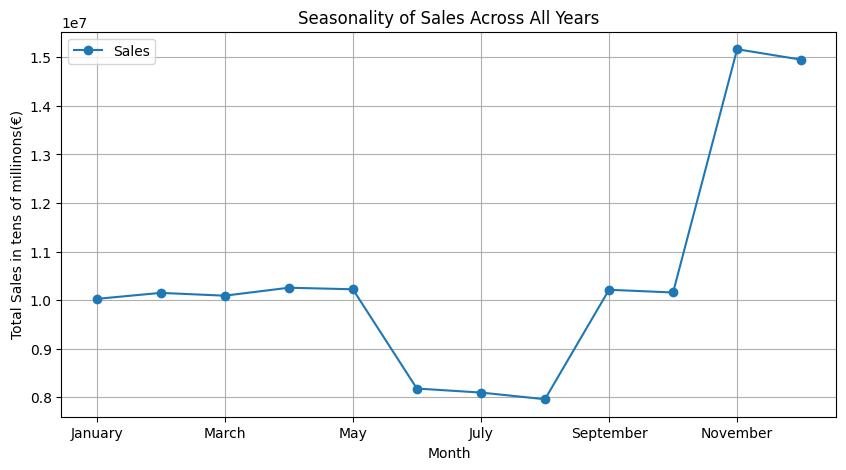

In [ ]:
# Creamos un gráfico para demostrar si hay algun tipo de temporalidad en las ventas.
ax = monthly_df.plot(
    x='Month',
    y='Sales',
    kind='line',
    marker='o',
    figsize=(10, 5)
)

ax.set_title('Seasonality of Sales Across All Years')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales in tens of millinons(€)')
ax.grid(True)
plt.savefig('seasonality.png', dpi=300, bbox_inches='tight')

In [ ]:
monthly_df['Sales']=monthly_df['Sales'].apply(lambda x: f"{x:,.0f} €".replace(",", "."))

In [ ]:
monthly_df

,Month,Sales
0,January,10.024.304 €
1,February,10.147.699 €
2,March,10.090.073 €
3,April,10.253.722 €
4,May,10.222.355 €
5,June,8.177.046 €
6,July,8.094.236 €
7,August,7.956.902 €
8,September,10.211.762 €
9,October,10.155.889 €


In [ ]:
df.head()

,Date,Order_ID,SKU_Name,Quantity,Sales,Location,Year,Month,city,lat,lng,region
0,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-1717,32,375.04,Gauthier Jacquot S.A.S.,2020,1,Bordeaux,44.84,-0.58,Nouvelle-Aquitaine
1,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-7661,36,615.96,Gauthier Jacquot S.A.S.,2020,1,Bordeaux,44.84,-0.58,Nouvelle-Aquitaine
2,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-6001,43,402.05,Gauthier Jacquot S.A.S.,2020,1,Bordeaux,44.84,-0.58,Nouvelle-Aquitaine
3,2020-01-06,fe89c540-d2fb-404e-a672-d6b0ea897e2d,SKU-6780,1,4.09,Carlier SA,2020,1,Lyon,45.76,4.84,Auvergne-Rhône-Alpes
4,2020-01-06,fe89c540-d2fb-404e-a672-d6b0ea897e2d,SKU-8445,4,19.76,Carlier SA,2020,1,Lyon,45.76,4.84,Auvergne-Rhône-Alpes


In [ ]:
# Determinamos cuántas órdenes se han realizado.
len(df['Order_ID'].unique())

60000

In [ ]:
# Creamos una pivot table que usando Order_ID como referencia cuente la cantidad total de SKUs por orden.
order_pivot= df.pivot_table(
    index='Order_ID',
    values='SKU_Name',
    aggfunc= 'count',
    fill_value=0
)

In [ ]:
order_pivot

,SKU_Name
Order_ID,
0000d964-40dc-4553-a26e-05ab508f0bad,20
0001bb49-8bd9-4af8-b5f4-a7e60052b674,9
0001c97e-f0fc-48f3-91c3-31f2929017fc,3
00036268-756b-45ef-a1ec-2a27d0beb077,8
0003968f-fcfe-40e4-ad39-3b785e5aeb5d,6
...,...
fffdc6b4-118a-42f7-a2b1-82bfa275bdce,2
fffe66e2-5ad8-44a7-ab3a-e737939e6203,2
ffff6606-299b-4e7b-a4f8-ff9809972093,30


In [ ]:
# Determinamos la media de SKUs por órdenes.
order_pivot.mean().round(0)

,0
SKU_Name,7.0


In [ ]:
# Creamos una pivot table que usando Order_ID como referencia sume la cantidad total de artículos por orden.
# Determinamos la media de artículos por órdenes.
order_size_pivot= df.pivot_table(
    index='Order_ID',
    values='Quantity',
    aggfunc= 'sum',
    fill_value=0
).mean().round(0)

In [ ]:
order_size_pivot

,0
Quantity,173.0


In [ ]:
# Determinamos el ticket promedio por orden.
order_amount_pivot= df.pivot_table(
    index='Order_ID',
    values='Sales',
    aggfunc= 'sum',
    fill_value=0
).mean().round(0)

In [ ]:
order_amount_pivot

,0
Sales,2091.0


In [ ]:
# Vamos a volver los valores antes calculados en variables para poder reportarlos.
avg_order_size = order_size_pivot.iloc[0]
avg_order_amount = order_amount_pivot.iloc[0]
avg_order_sku=order_pivot.mean().round(0).iloc[0]

In [ ]:
print(f'The average number of SKUs per order is {avg_order_sku}')
print(f'The average quantity per order is {avg_order_size}')
print(f'The average sales amount per order is € {avg_order_amount:,.0f}')

The average number of SKUs per order is 7.0
The average quantity per order is 173.0
The average sales amount per order is € 2,091


In [ ]:
# Creamos una tabla que reporte los SKUs con mejor desempeño en cada año
top_sku_sales_year_chart = pd.DataFrame({
    'Top_SKUs': sales_sku_pivot.idxmax(),
    'Top_Sales': sales_sku_pivot.max()
}).reset_index()

In [ ]:
top_sku_sales_year_chart


,Year,Top_SKUs,Top_Sales
0,2020,SKU-6682,2.151660e+06
1,2021,SKU-3044,2.159726e+06
2,2022,SKU-6682,2.214864e+06
3,2023,SKU-3044,2.320167e+06
4,2024,SKU-6682,2.319490e+06


In [ ]:
import matplotlib.ticker as mticker

In [ ]:
import matplotlib.image as image

In [ ]:
# Importamos el logo de nuestra institución.
im = image.imread('savila_logo.png')

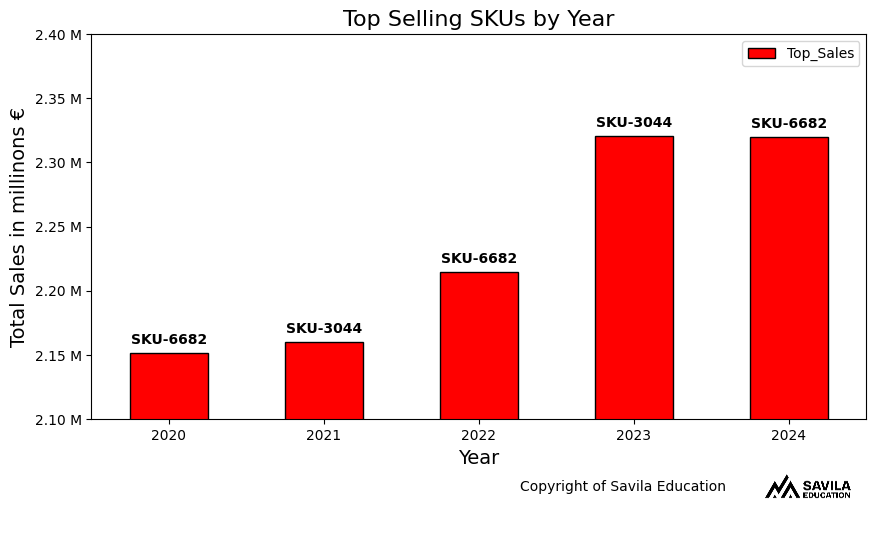

In [ ]:
# Creamos un gráfico de barras que reporte el SKU de mejor desempeño en cada año.
ax = top_sku_sales_year_chart.plot(
    x='Year',
    y='Top_Sales',
    kind='bar',
    figsize=(10, 5),
    color='red',
    edgecolor='black'
)

ax.set_title('Top Selling SKUs by Year', fontsize= 16)
ax.set_xlabel('Year',fontsize= 14)
ax.set_ylabel('Total Sales in millinons €',fontsize= 14)
ax.set_ylim(2.1e6,2.4e6)
ax.grid(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

def format_millions(x, pos):
    return f'{x/1e6:.2f} M'

ax.yaxis.set_major_formatter(mticker.FuncFormatter(format_millions))

for bar,seller in zip(ax.patches, top_sku_sales_year_chart['Top_SKUs']):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 5000,
        seller,
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        fontweight='bold'
    )

image_xaxis=0.77
image_yaxis=-0.1
image_width=0.15
image_height=0.15
ax_image = plt.axes([image_xaxis, image_yaxis, image_width, image_height])
ax_image.imshow(im)
ax_image.axis('off')

plt.text(
    image_xaxis - 0.01,
    image_yaxis + image_height / 2,
    "Copyright of Savila Education",
    transform=plt.gcf().transFigure,
    fontsize=10,
    ha='right',
    va='center'
)

plt.savefig('top_skus_by_year.png', dpi=300, bbox_inches='tight')


In [ ]:
# En este punto creí que sales_sku_pivot no me serviría porque pensé que había vuelto los números strings.
# Este no fue el caso por lo cual me pude haber ahorrado este paso.
# Lo que voy hacer ahora es determinar cuáles son los Top 3 SKUs ya que creo que eso puede mostrar una mejor narrativa que nada
  # más el winner.
sku_year_pivot = df.pivot_table(
    index='SKU_Name',
    columns='Year',
    values='Sales',
    aggfunc='sum',
    fill_value=0
)


In [ ]:
sku_year_pivot

Year,2020,2021,2022,2023,2024
SKU_Name,,,,,
SKU-1173,1258680.00,1.218548e+06,1.334328e+06,1.371395e+06,1.404649e+06
SKU-1717,1228654.48,1.230192e+06,1.326230e+06,1.288411e+06,1.369485e+06
SKU-2972,901544.49,9.366693e+05,9.407545e+05,9.609258e+05,1.004066e+06
SKU-2983,481992.72,4.854429e+05,4.949293e+05,5.195108e+05,5.176147e+05
SKU-3044,2067991.97,2.159726e+06,2.211995e+06,2.320167e+06,2.313988e+06
SKU-3852,1799586.50,1.801304e+06,1.832212e+06,1.810458e+06,1.964066e+06
SKU-5004,801482.00,7.934917e+05,8.406192e+05,8.198206e+05,8.725593e+05
SKU-5304,1604480.00,1.581203e+06,1.647271e+06,1.690282e+06,1.761236e+06
SKU-5373,1771535.92,1.857189e+06,1.956555e+06,1.941630e+06,2.052847e+06


In [ ]:
# Creo una función para elegir el Top 3 de cada año.
top3_per_year = (
    sku_year_pivot
    .apply(lambda col: col.nlargest(3))
)


In [ ]:
top3_per_year

Year,2020,2021,2022,2023,2024
SKU_Name,,,,,
SKU-3044,2067991.97,2.159726e+06,2.211995e+06,2.320167e+06,2.313988e+06
SKU-6682,2151660.00,2.104037e+06,2.214864e+06,2.261660e+06,2.319490e+06
SKU-9023,1922324.80,1.963878e+06,1.959359e+06,2.091193e+06,2.178015e+06


In [ ]:
# Voy a reorganizar la información para que ahora los SKUs sean columnas y sea un poco más facil
# determinar el share de cada SKU por año, así como crear un stacked bar chart.
stacked_df = (
    top3_per_year
    .stack()          # SKU becomes a column
    .reset_index()
    .rename(columns={'level_1': 'Year', 0: 'Sales'})
    .pivot(index='Year', columns='SKU_Name', values='Sales')
)


In [ ]:
stacked_df

SKU_Name,SKU-3044,SKU-6682,SKU-9023
Year,,,
2020,2.067992e+06,2.151660e+06,1.922325e+06
2021,2.159726e+06,2.104037e+06,1.963878e+06
2022,2.211995e+06,2.214864e+06,1.959359e+06
2023,2.320167e+06,2.261660e+06,2.091193e+06
2024,2.313988e+06,2.319490e+06,2.178015e+06


In [ ]:
# Determino el share de cada SKU.
row_totals = stacked_df.sum(axis=1)
percentage_df = stacked_df.div(row_totals, axis=0) * 100


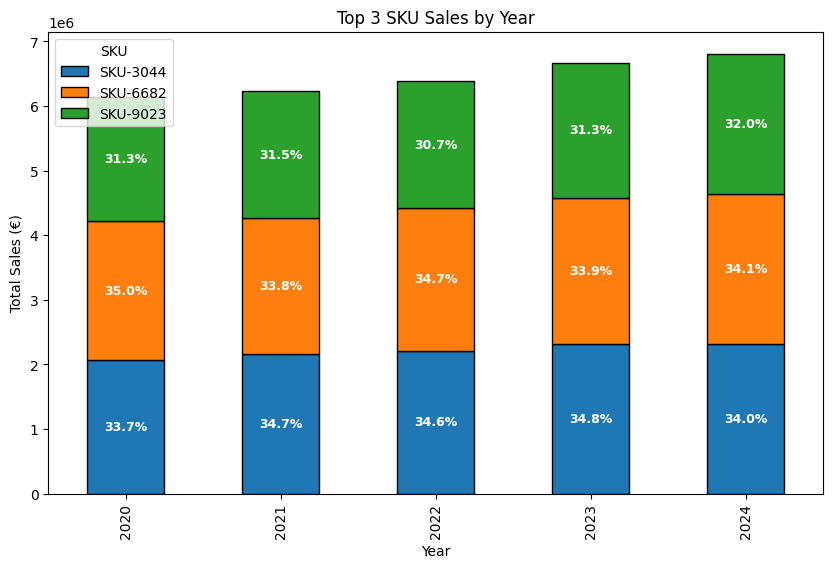

In [ ]:
# Creamos un Stacked Bar con los Top 3 SKUs de cada año.
ax = stacked_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    edgecolor='black'
)

ax.set_title('Top 3 SKU Sales by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales (€)')
ax.legend(title='SKU')
ax.grid(False)

for year_idx, year in enumerate(stacked_df.index):
    cumulative_height = 0

    for sku in stacked_df.columns:
        value = stacked_df.loc[year, sku]
        pct = percentage_df.loc[year, sku]

        if value == 0:
            continue  # skip empty segments

        ax.text(
            year_idx,
            cumulative_height + value / 2,
            f"{pct:.1f}%",
            ha='center',
            va='center',
            fontsize=9,
            color='white',
            fontweight='bold'
        )

        cumulative_height += value



In [ ]:
# Vamos a repetir la misma dinámica anterior esta vez con el resultado de los mayoristas en ventas por año.
top_wholesellers_chart=df.pivot_table(
    index='Location',
    values='Sales',
    columns='Year',
    aggfunc= 'sum',
    fill_value=0
)
top_wholesellers_year_chart=pd.DataFrame({
    'Top_Wholesellers':top_wholesellers.idxmax(),
    'Top_Sales':top_wholesellers.max()
}).reset_index().rename(columns={"Year": "Year"})

In [ ]:
top3_wholeseller_per_year = (
    top_wholesellers_chart
    .apply(lambda col: col.nlargest(3))
)

In [ ]:
top_wholesellers_year_chart

,Year,Top_Wholesellers,Top_Sales
0,2020,Gauthier,652197.030000
1,2021,Marty,661752.056681
2,2022,Marty,670099.376249
3,2023,Gauthier,680380.544047
4,2024,Marty,668061.546331


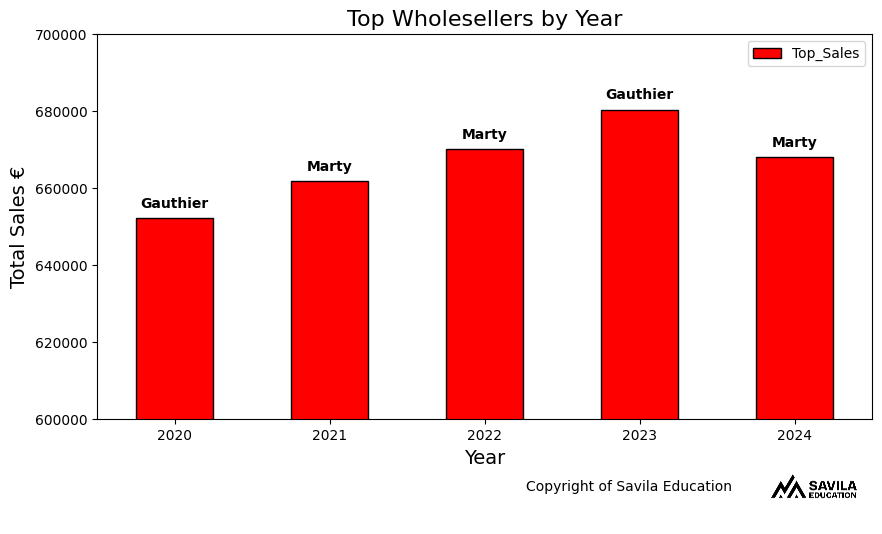

In [ ]:
ax = top_wholesellers_year_chart.plot(
    x='Year',
    y='Top_Sales',
    kind='bar',
    figsize=(10, 5),
    color='red',
    edgecolor='black'
)

ax.set_title('Top Wholesellers by Year', fontsize= 16)
ax.set_xlabel('Year',fontsize= 14)
ax.set_ylabel('Total Sales €',fontsize= 14)
ax.set_ylim(600000,700000)
ax.grid(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


for bar,seller in zip(ax.patches, top_wholesellers_year_chart['Top_Wholesellers']):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 2000,
        seller,
        ha='center',
        va='bottom',
        fontsize=10,
        color='black',
        fontweight='bold'
    )

image_xaxis=0.77
image_yaxis=-0.1
image_width=0.15
image_height=0.15
ax_image = plt.axes([image_xaxis, image_yaxis, image_width, image_height])
ax_image.imshow(im)
ax_image.axis('off')

plt.text(
    image_xaxis - 0.01,
    image_yaxis + image_height / 2,
    "Copyright of Savila Education",
    transform=plt.gcf().transFigure,
    fontsize=10,
    ha='right',
    va='center'
)
plt.savefig('top_wholesellers_by_year.png', dpi=300, bbox_inches='tight')


In [ ]:
top3_wholeseller_per_year

Year,2020,2021,2022,2023,2024
Location,,,,,
Carpentier,NaN,NaN,NaN,651524.486024,NaN
Gauthier,652197.03,575095.856519,630099.645281,680380.544047,657613.203771
Gautier,NaN,557792.644380,638584.062513,616834.682722,NaN
Marty,591651.03,661752.056681,670099.376249,NaN,668061.546331
Pichon,588070.53,NaN,NaN,NaN,639096.833044


In [ ]:
stacked_wholesellers_df = (
    top3_wholeseller_per_year
    .stack()          # SKU becomes a column
    .reset_index()
    .rename(columns={'level_1': 'Year', 0: 'Sales'})
    .pivot(index='Year', columns='Location', values='Sales')
)


In [ ]:
stacked_wholesellers_df

Location,Carpentier,Gauthier,Gautier,Marty,Pichon
Year,,,,,
2020,NaN,652197.030000,NaN,591651.030000,588070.530000
2021,NaN,575095.856519,557792.644380,661752.056681,NaN
2022,NaN,630099.645281,638584.062513,670099.376249,NaN
2023,651524.486024,680380.544047,616834.682722,NaN,NaN
2024,NaN,657613.203771,NaN,668061.546331,639096.833044


In [ ]:
row_wholesellers_totals = stacked_wholesellers_df.sum(axis=1)
percentage_wholesellers_df = stacked_wholesellers_df.div(row_wholesellers_totals, axis=0) * 100

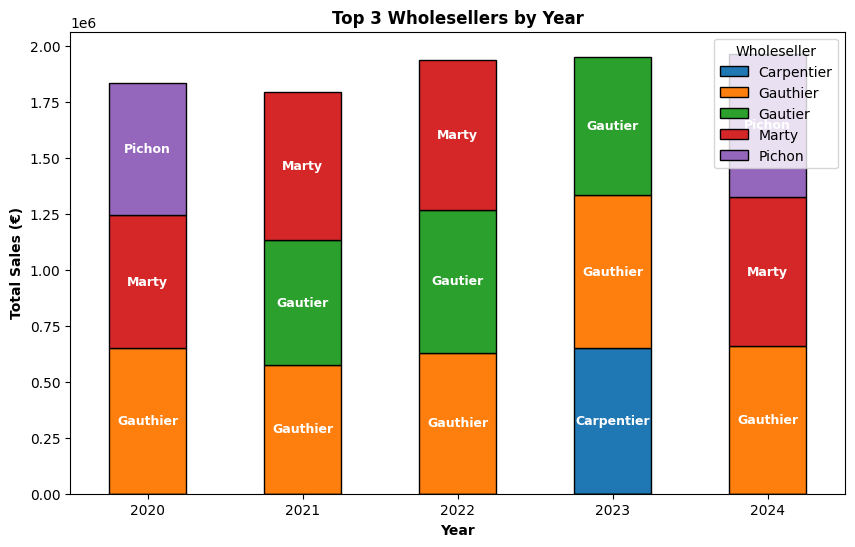

In [ ]:
ax = stacked_wholesellers_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    edgecolor='black'
)

ax.set_title('Top 3 Wholesellers by Year',weight='bold')
ax.set_xlabel('Year',weight='bold')
ax.set_ylabel('Total Sales (€)',weight='bold')
ax.legend(title='Wholeseller')
ax.grid(False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for year_idx, year in enumerate(stacked_wholesellers_df.index):
    cumulative_height = 0

    for Location in stacked_wholesellers_df.columns:
        value = stacked_wholesellers_df.loc[year, Location]
        pct = percentage_wholesellers_df.loc[year, Location]

        if pd.isna(value) or value ==0:
            continue  # skip empty segments

        ax.text(
            year_idx,
            cumulative_height + value / 2,
            Location,
            ha='center',
            va='center',
            fontsize=9,
            color='white',
            fontweight='bold'
        )

        cumulative_height += value



In [ ]:
# Importamos las librerías necesarias para poder manipular Geopandas.
import geopandas as gpd
import matplotlib.colors as mcolors

In [ ]:
# Exploramos el archivo Zip de paises y renombramos las columnas.
gdf = gpd.read_file('countries_maps.zip')
gdf = gdf.rename(columns={'ADMIN': 'name'})

In [ ]:
# Creamos un set exclusivamente con aquellas coordenadas correspondientes a Francia (France)
france = gdf[gdf['name'] == 'France']

In [ ]:
df.head()

,Date,Order_ID,SKU_Name,Quantity,Sales,Location,Year,Month,city,lat,lng,region
0,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-1717,32,375.04,Gauthier Jacquot S.A.S.,2020,1,Bordeaux,44.84,-0.58,Nouvelle-Aquitaine
1,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-7661,36,615.96,Gauthier Jacquot S.A.S.,2020,1,Bordeaux,44.84,-0.58,Nouvelle-Aquitaine
2,2020-01-01,19b25d74-0510-4dcd-81a3-491ef06e538e,SKU-6001,43,402.05,Gauthier Jacquot S.A.S.,2020,1,Bordeaux,44.84,-0.58,Nouvelle-Aquitaine
3,2020-01-06,fe89c540-d2fb-404e-a672-d6b0ea897e2d,SKU-6780,1,4.09,Carlier SA,2020,1,Lyon,45.76,4.84,Auvergne-Rhône-Alpes
4,2020-01-06,fe89c540-d2fb-404e-a672-d6b0ea897e2d,SKU-8445,4,19.76,Carlier SA,2020,1,Lyon,45.76,4.84,Auvergne-Rhône-Alpes


In [ ]:
# Creamos la pivot table con ventas totales por región a lo largo de los años.
region_df = df.pivot_table(
    index='region',
    values=['Sales','lat','lng'],
    aggfunc= {'Sales': 'sum', 'lat': 'first', 'lng':'first'},
    fill_value=0
).reset_index()

In [ ]:
region_df

,region,Sales,lat,lng
0,Auvergne-Rhône-Alpes,2.582017e+07,45.7600,4.8400
1,Bourgogne-Franche-Comté,4.855057e+06,47.3167,5.0167
2,Bretagne,7.613819e+06,48.1147,-1.6794
3,Grand Est,1.231458e+07,48.5833,7.7458
4,Hauts-de-France,4.755565e+06,50.6278,3.0583
5,Normandie,9.667382e+06,49.4900,0.1000
6,Nouvelle-Aquitaine,5.026297e+06,44.8400,-0.5800
7,Occitanie,1.826890e+07,43.8383,4.3597
8,Pays de la Loire,1.096279e+07,47.4736,-0.5542
9,Provence-Alpes-Côte d’Azur,1.907410e+07,43.7034,7.2663


In [ ]:
# Vamos a crear una nueva columna que sea la referencia de tamaño en comparación con la región de mayores ventas.
max_sales = region_df['Sales'].max()
region_df['Size']=(region_df['Sales']/max_sales)*1000

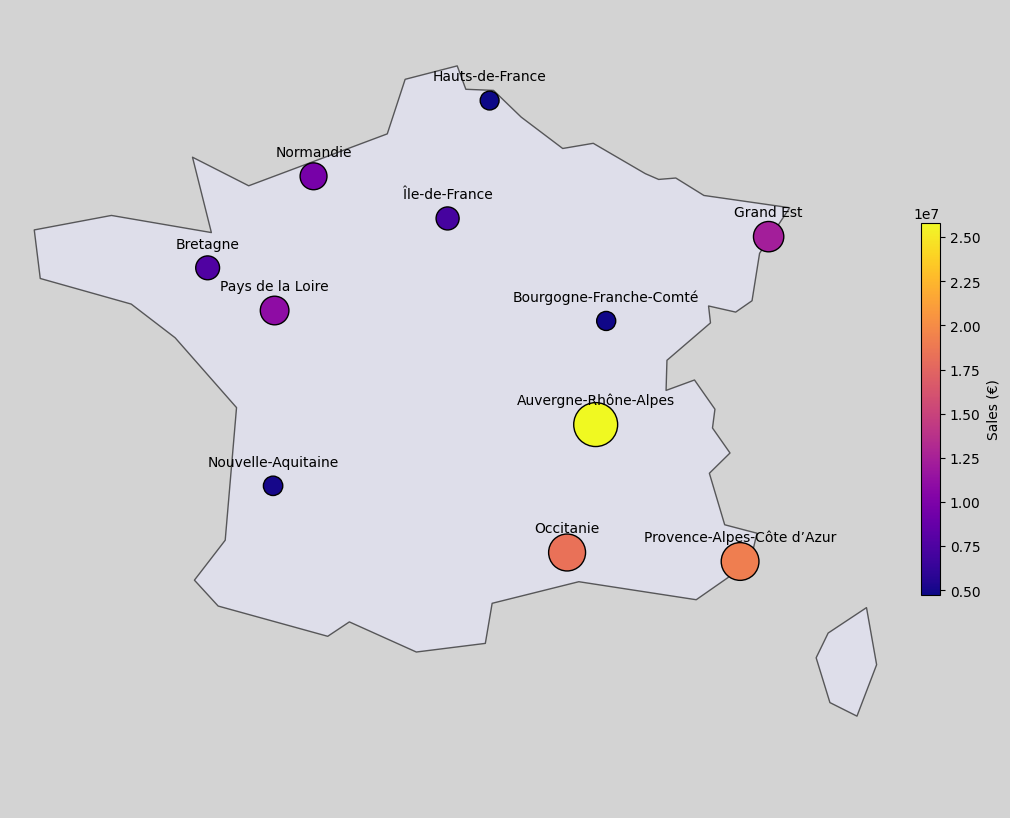

In [ ]:
# Creamos el mapa con la información anterio incluyendo una barra referencial de la magnitud de ventas por región.
norm = mcolors.Normalize(vmin=region_df['Sales'].min(), vmax=max_sales)

cmap= plt.get_cmap('plasma')


fig, ax = plt.subplots(figsize=(12, 12))

france.plot(color='lavender', edgecolor='black', alpha=0.6, ax=ax)
fig.patch.set_facecolor('lightgray')

ax.set_xlim(-5, 10)
ax.set_ylim(40, 52)

scatter = ax.scatter(
    region_df['lng'],
    region_df['lat'],
    s=region_df['Size'],
    c=region_df['Sales'],
    cmap=cmap,
    edgecolors='black',
    norm=norm
    )
for i, row in region_df.iterrows():
    ax.annotate(
        row['region'],
        xy=(row['lng'], row['lat']+0.3),
        xytext=(0, 0),
        textcoords='offset points',
        ha= 'center',
        fontsize=10,
        color='black',

    )
scatter.set_norm(norm)
cbar = plt.colorbar(scatter, ax=ax, fraction=0.02, pad=0.02)
cbar.set_label("Sales (€)")
plt.axis('off')
plt.savefig('france_regional_sales.png', dpi=300, bbox_inches='tight')

In [ ]:
! pip install XlsxWriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 4.6 MB/s eta 0:00:00


In [ ]:
# Finalmente creamos el reporte en excel para compartir con nuestros compañeros
with pd.ExcelWriter('sale_summary.xlsx') as writer:
  workbook = writer.book
  currency_format = workbook.add_format({'num_format': '#,##0 €', 'align': 'right'})
#SKUs
  top_sku_sales_year_chart.to_excel(writer, sheet_name='Top SKUs', index=False,startrow=1, startcol=1)
  worksheet_sku= writer.sheets['Top SKUs']
  col_idx_sales=  top_sku_sales_year_chart.columns.get_loc('Top_Sales') +1
  worksheet_sku.set_column(col_idx_sales,col_idx_sales,15, currency_format)
  worksheet_sku.insert_image('F2', 'top_skus_by_year.png')

#Wholesellers
  top_wholesellers_year_chart.to_excel(writer, sheet_name='Top Wholesellers by Year', index=False,startrow=1, startcol=1)
  worksheet_wholesellers= writer.sheets['Top Wholesellers by Year']
  col_idx_sales=  top_wholesellers_year_chart.columns.get_loc('Top_Sales') +1
  worksheet_wholesellers.set_column(col_idx_sales,col_idx_sales,15, currency_format)
  worksheet_wholesellers.insert_image('F2', 'top_wholesellers_by_year.png')

#Region
  region_df[['region','Sales']].to_excel(writer, sheet_name='Regional Sales', index=False,startrow=1, startcol=1)
  worksheet_region= writer.sheets['Regional Sales']
  col_idx_sales=  region_df[['region','Sales']].columns.get_loc('Sales') +1
  worksheet_region.set_column(col_idx_sales,col_idx_sales,15, currency_format)
  worksheet_region.insert_image('F2', 'france_regional_sales.png')

#Seasonality
  monthly_df.to_excel(writer, sheet_name='Monthly Sales', index=False,startrow=1, startcol=1)
  worksheet_monthly= writer.sheets['Monthly Sales']
  col_idx_sales=  monthly_df.columns.get_loc('Sales') +1
  worksheet_monthly.set_column(col_idx_sales,col_idx_sales,15)
  worksheet_monthly.insert_image('F2', 'seasonality.png')
